# END TO END MACHINE LEARNING PROJECT EXAMPLE

## Most of the time there are 8 steps you'll usually go through in ML
## 1. Look at the big Picture
## 2. Get the Data
## 3. Discover and Visusalise the data to get insights
## 4. Prepare the data for machine learning algorithm
## 5. Select a Model and train it
## 6. Fine Tune Your model
## 7. Present Your solution
## 8. Launch Monitor and maintain your system|

#### 

## Popular open data repositories
UC Irvine Machine Learning Repository

Kaggle datasets

Amazon’s AWS datasets

## Meta portals (they list open data repositories) Data Portal


 OpenDataMonit
    
 ndl

##  Other pages listing many popular open data repositoriesWikipedia’s list of Machine Learning datasets


Quora.co


The datasets subreditdditndl

# Before You begin any data science project you need to understand what the objective is

# 2. Get the Data

In [1]:
# For file manipulation 
from pathlib import Path
import pandas as pd
# For .tar files
import tarfile
# For getting infomation from the web through http(dowmload files)
import urllib.request 

In [2]:
def housing_data():
    # This takes into account the file path end
    path = Path('datasets/housing.tgz')

    # The condition if it isnt a file
    if not path.is_file():
        # This checks if its the parent and if it exist
        Path('datasets').mkdir(parents=True, exist_ok=True)

        url = 'https://github.com/ageron/data/raw/main/housing.tgz'
        urllib.request.urlretrive(url, path)

        with tarfile.open(path) as housing_tar:
            housing_tar.extractall(path='datasets')

    return pd.read_csv(Path('datasets/housing/housing.csv'))

housing_d = housing_data()
"""
The function checks if the file datasets/housing.tgz exists.
If the file doesn't exist, it downloads it from the provided URL.
It then extracts the contents of the .tgz file into the datasets/housing/ directory.
After extraction, the function reads the CSV file (housing.csv) into a pandas DataFrame and returns it.
"""

"\nThe function checks if the file datasets/housing.tgz exists.\nIf the file doesn't exist, it downloads it from the provided URL.\nIt then extracts the contents of the .tgz file into the datasets/housing/ directory.\nAfter extraction, the function reads the CSV file (housing.csv) into a pandas DataFrame and returns it.\n"

In [3]:
housing_d.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing_d.info()
"""
The 
info()
method is useful to get a quick description of the data, in
particular the total number of rows, each attribute’s type, and the number of
nonnull values 
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


'\nThe \ninfo()\nmethod is useful to get a quick description of the data, in\nparticular the total number of rows, each attribute’s type, and the number of\nnonnull values \n'

In [5]:
housing_d['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
len(housing_d)

20640

In [7]:
housing_d.describe() # For numerical description of the data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
# To save the images as high res images on the notebook
IMAGE_PATH = Path() / 'images' / 'end_to_end project'
IMAGE_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = IMAGE_PATH / f'{fig_id}.{fig_extension}'
    if tight_layout:
        plt.tight_layout()
        plt.savefig(path, format=fig_extension, dpi=resolution)

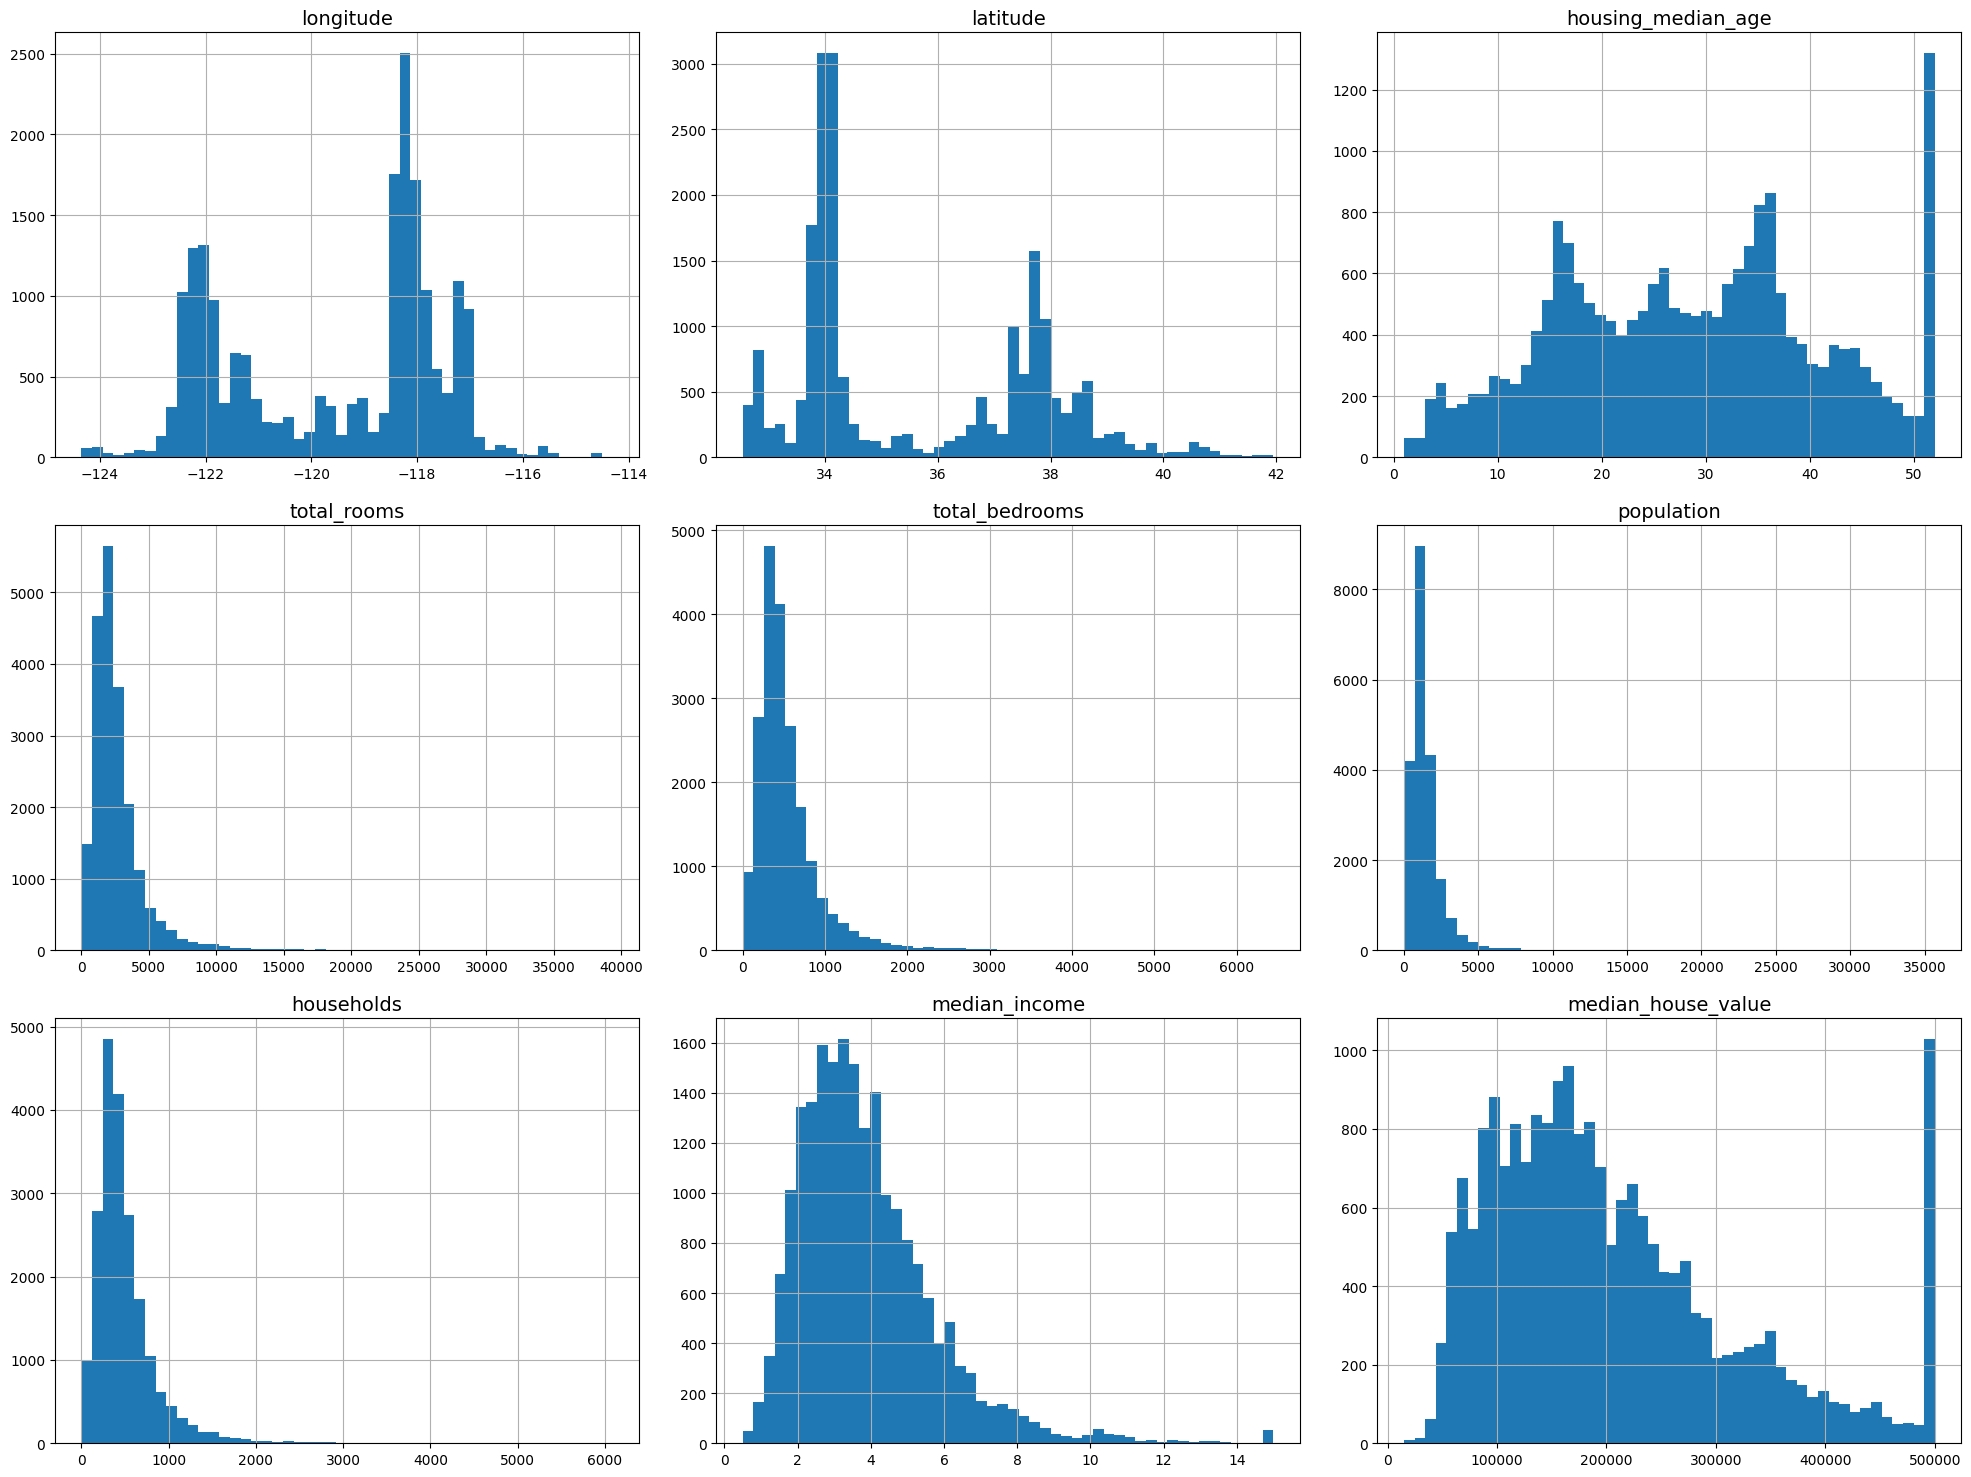

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
# Not necessary just for specification
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
# Very necessary
housing_d.hist(figsize=(20, 15), bins=50)
save_fig('Histogram of housing california')
plt.show()

# Its important to understand how the data was computed for isntance, the housing median income was scaled at 
# Many histograms are tail heavy as they extend much father to the right of the median  

In [10]:
# Creating a test set of the data you can use sklearn.model selection import train_test_split if you are familiar with it

import numpy as np

def train_test(data, test_ratio):
     shuffled_indicies = np.random.permutation(len(data))
     test_set_size = int(len(data) * test_ratio)
     test_indicies = shuffled_indicies[:test_set_size]
     train_indicies = shuffled_indicies[test_set_size:]
     return data.iloc[train_indicies],  data.iloc[test_indicies]

In [11]:
train, test = train_test(housing_d, 0.2)

In [12]:
print(f'No of rows of the train_set: {len(train)}')
train.head()

No of rows of the train_set: 16512


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2766,-118.67,34.30,5.0,6123.0,825.0,2440.0,736.0,7.9013,393000.0,<1H OCEAN
18156,-118.01,34.06,26.0,557.0,153.0,455.0,196.0,2.7721,155400.0,INLAND
15744,-121.62,36.63,52.0,1437.0,298.0,836.0,257.0,3.6286,165500.0,<1H OCEAN
17179,-118.45,34.05,23.0,4099.0,1287.0,2103.0,1217.0,3.7549,275000.0,<1H OCEAN
19873,-122.06,37.00,14.0,1547.0,374.0,4731.0,348.0,2.4732,131300.0,NEAR OCEAN


In [13]:
print(f'No of rows of the test_set: {len(test)}')
test.head()

No of rows of the test_set: 4128


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5043,-117.11,32.75,18.0,1943.0,587.0,1329.0,522.0,1.7696,103100.0,NEAR OCEAN
11292,-118.40,34.00,34.0,1816.0,335.0,872.0,339.0,4.8500,329400.0,<1H OCEAN
20080,-122.45,37.78,52.0,2033.0,438.0,2198.0,418.0,3.6667,418400.0,NEAR BAY
3896,-122.51,37.89,27.0,2674.0,565.0,1233.0,547.0,3.4485,458300.0,NEAR BAY
16959,-121.87,37.38,16.0,1050.0,245.0,722.0,228.0,4.5187,163500.0,<1H OCEAN


## You do not want your machine learning algorithm to view the entire data set cuz evrytime you run the fxn you get a different set of data so we will be trying a new algorithm
we need to call np.random.permutation() before calling np.random.seed() is the solution.
Sadly, this won't guarantee that this notebook will output exactly the same results as in the notebook, since there are other possible sources of variation. The most important is the fact that algorithms get tweaked over time when libraries evolve. So please tolerate some minor differences: hopefully, most of the outputs should be the same, or at least in the right ballpark.

Note: another source of randomness is the order of Python sets: it is based on Python's `hash()` function, which is randomly "salted" when Python starts up (this started in Python 3.3, to prevent some denial-of-service attacks). To remove this randomness, the solution is to set the `PYTHONHASHSEED` environment variable to `"0"` _before_ Python even starts up. Nothing will happen if you do it after that. Luckily, if you're running this notebook on Colab, the variable is already set for you.


In [14]:
from zlib import crc32
def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2 ** 32


def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [15]:
housing_with_id = housing_d.reset_index() # adds a new column called index

In [16]:
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [17]:
train_set, test_set = split_data_with_id_hash(id_column='index', data=housing_with_id, test_ratio=0.2)


In [18]:
train_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


In [19]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
16,16,-122.27,37.85,52.0,1966.0,347.0,793.0,331.0,2.7750,152500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY


In [20]:
housing_with_id['id'] = housing_d['longitude'] * 1000 + housing_d['latitude']
train_set, test_set = split_data_with_id_hash(id_column='id', data=housing_with_id, test_ratio=0.2)

In [21]:
from sklearn.model_selection import train_test_split
train_test, test_set = train_test_split(housing_d, test_size=0.2, random_state=101)

In [22]:
test_set['total_bedrooms'].isnull().sum()

46

In [23]:
train_set['total_bedrooms'].isnull().sum()

162

In [24]:
train_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,-121050.52
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,-121170.51
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,-121180.57
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,-121280.57


In [25]:
housing_d.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [26]:
from scipy.stats import binom

In [27]:
# extra code – shows how to compute the 10.7% proba of getting a bad sample

from scipy.stats import binom

sample_size = 1000
ratio_female = 0.511
proba_too_small = binom(sample_size, ratio_female).cdf(485 - 1)
proba_too_large = 1 - binom(sample_size, ratio_female).cdf(535)
print(proba_too_small + proba_too_large)

0.10736798530929942


In [28]:
housing_d['Income Category'] = pd.cut(housing_d['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

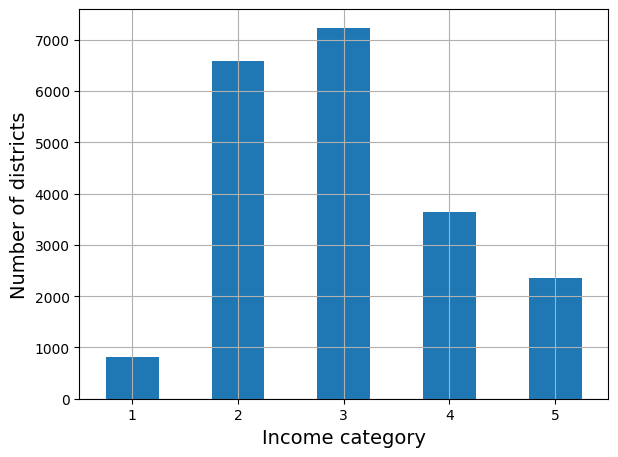

In [29]:
housing_d['Income Category'].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
save_fig("housing_income_cat_bar_plot")  # extra code
plt.show()

In [30]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
stratified_split = []
for train_index, test_index in split.split(housing_d, housing_d['Income Category']):
    train_set = housing_d.iloc[train_index]
    test_set = housing_d.iloc[test_index]
    stratified_split.append([train_set, test_set])
    

In [31]:
strat_train_set, strat_test_set = stratified_split[0]

In [32]:
strat_train_set['Income Category'].value_counts() / len(strat_test_set)

Income Category
3    1.402374
2    1.275436
4    0.705184
5    0.457849
1    0.159157
Name: count, dtype: float64

In [33]:
strat_train_set['Income Category'].value_counts()

Income Category
3    5789
2    5265
4    2911
5    1890
1     657
Name: count, dtype: int64

In [34]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('Income Category', axis=1, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_2412\2821795194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop('Income Category', axis=1, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_2412\2821795194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop('Income Category', axis=1, inplace=True)


In [35]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,500001.0,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,88800.0,INLAND
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,148800.0,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,500001.0,<1H OCEAN


# 3. Discover and Visualise the data to gain insight


In [36]:
housing = strat_train_set.copy()

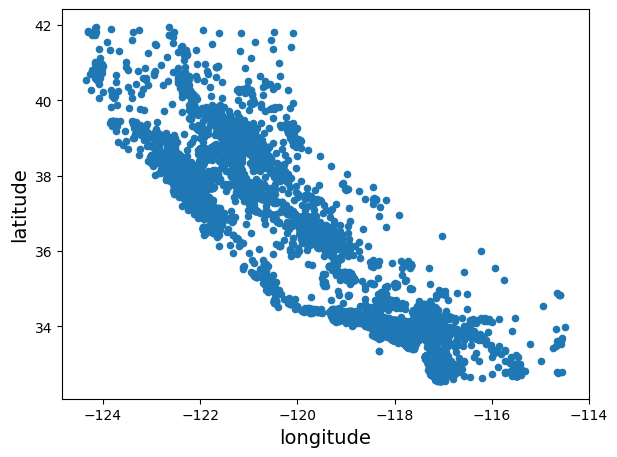

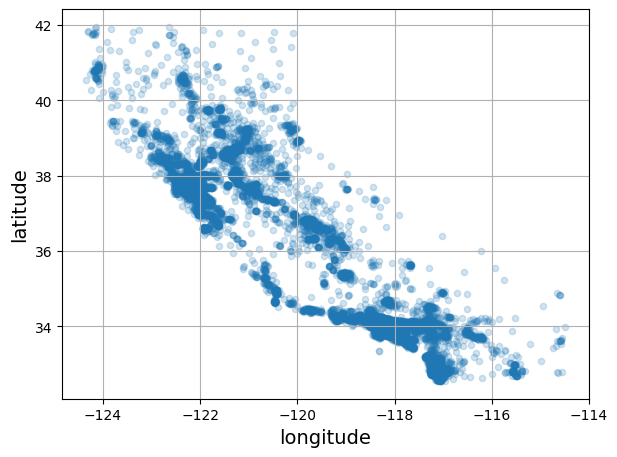

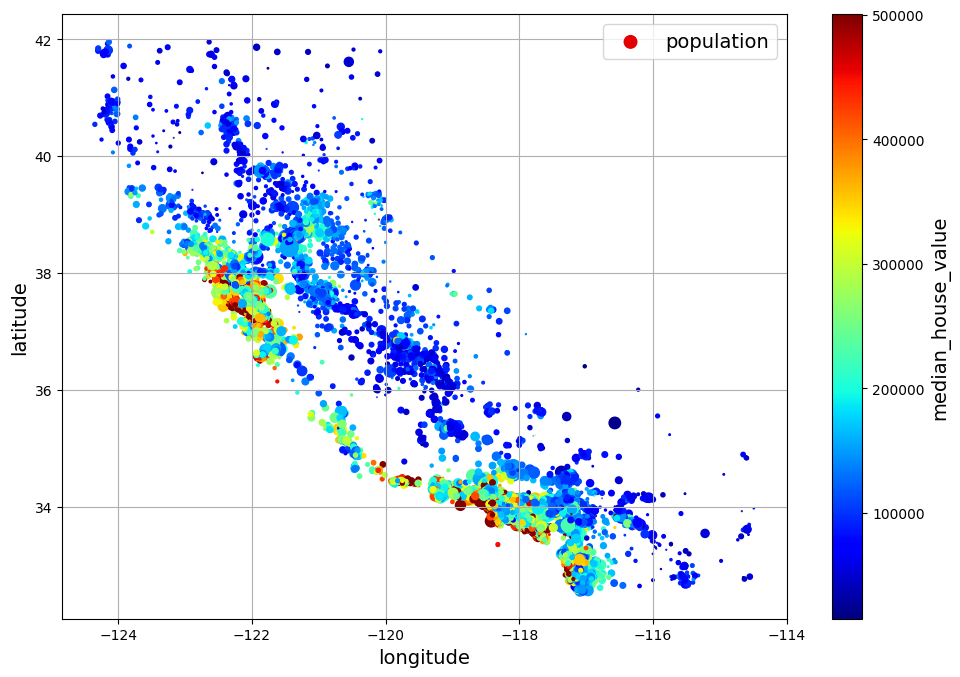

In [37]:
housing.plot(kind='scatter',  x='longitude', y='latitude')
save_fig('Bad visualisation plot')
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
save_fig('Good visualisation plot')
housing.plot(kind='scatter', x='longitude', y='latitude',
             grid=True, s=housing['population'] / 100, label='population',
            c='median_house_value', cmap='jet', colorbar=True, legend=True,
            sharex=False, figsize=[10, 7])
save_fig('scatter plot of housing prices')
plt.show()

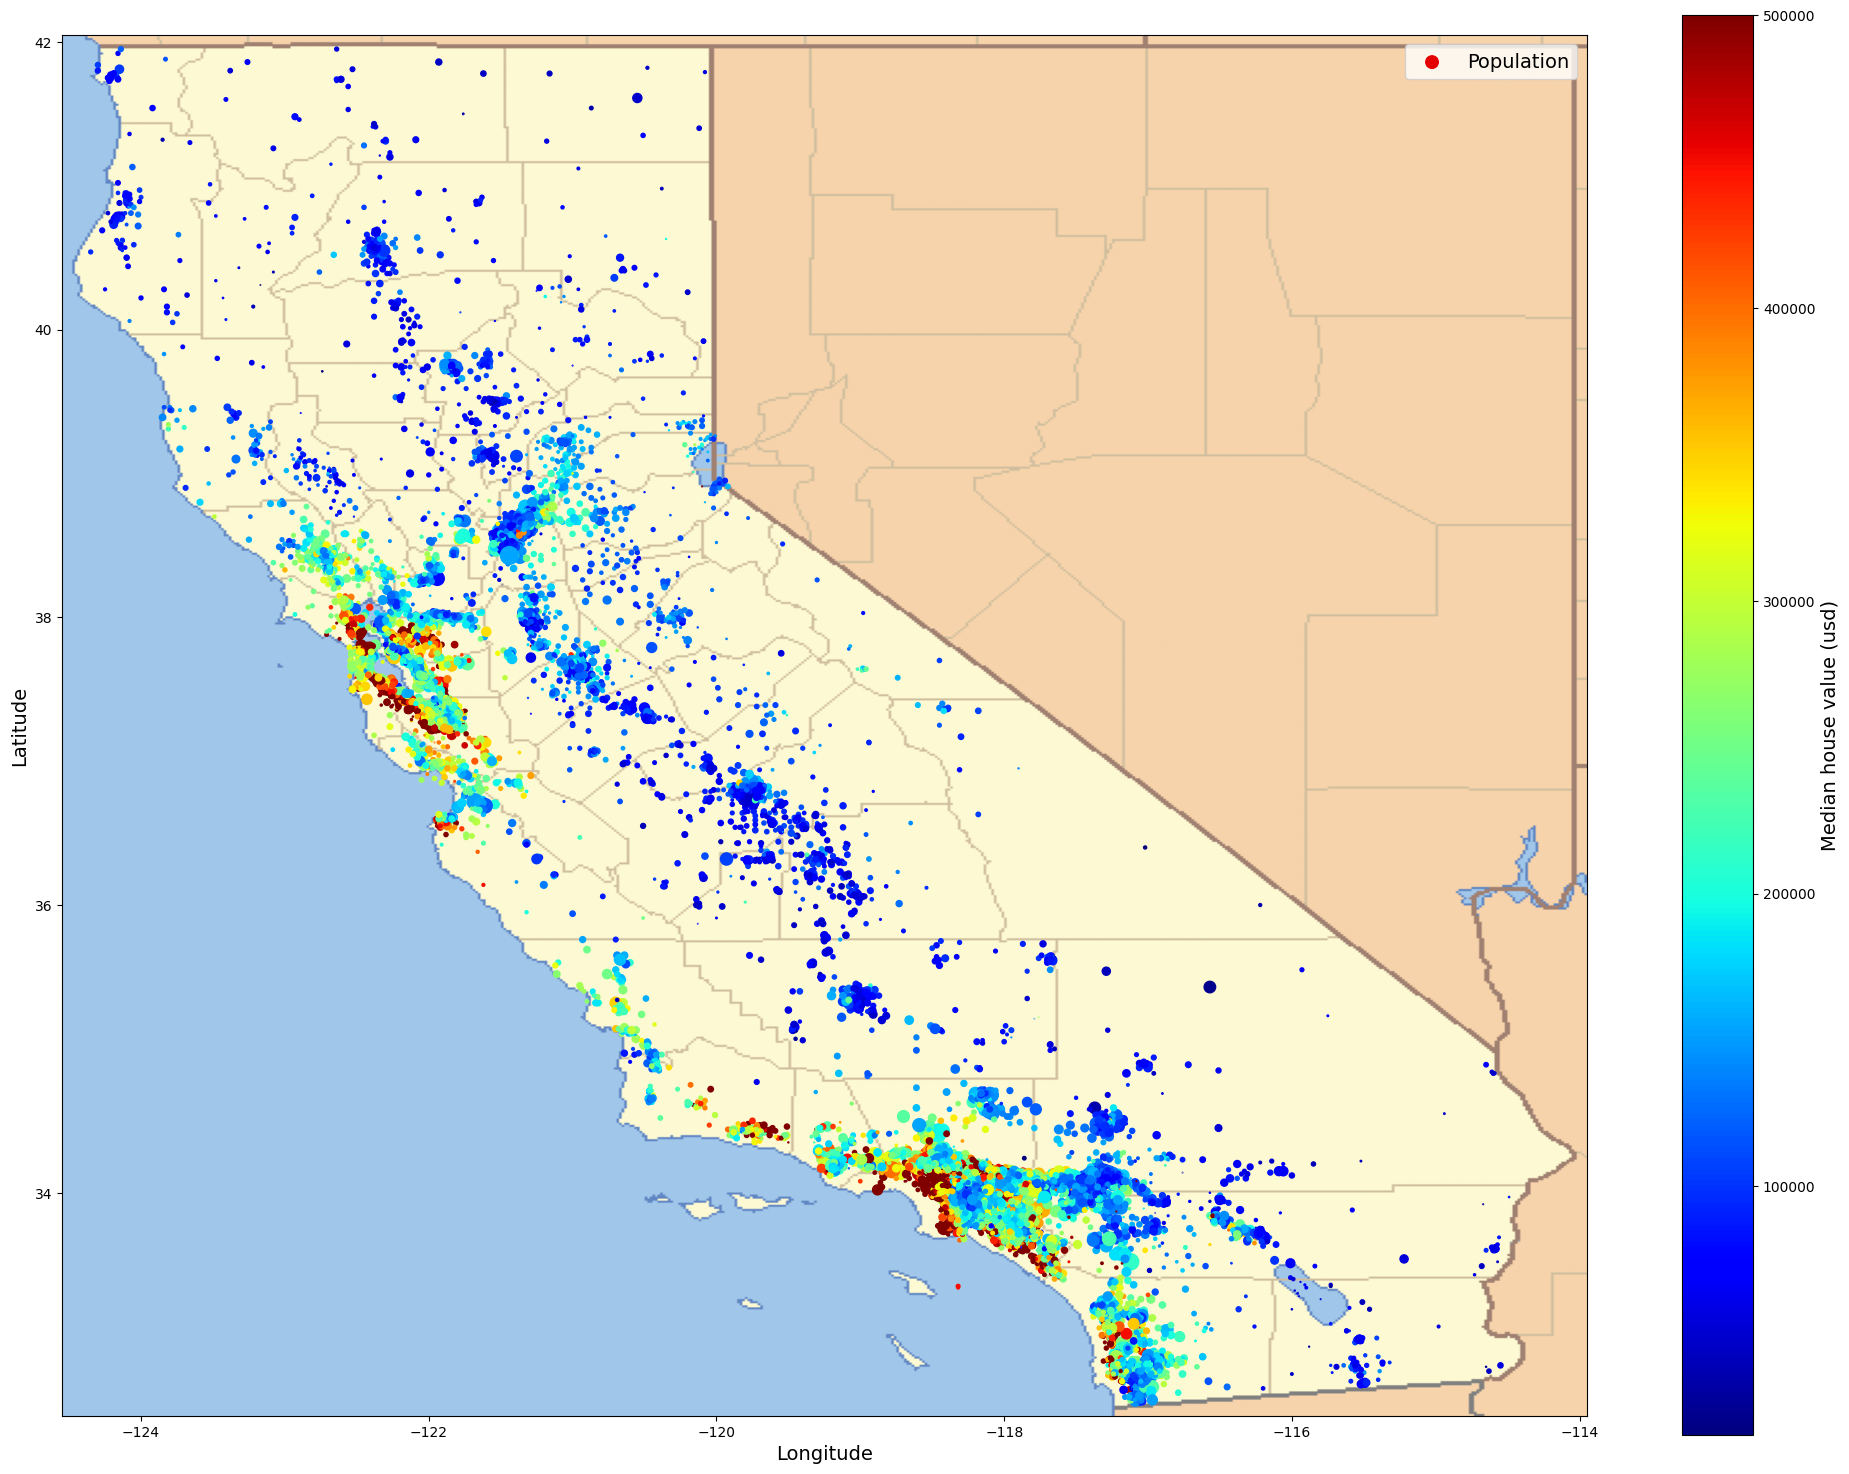

In [38]:
# TO download california housing
# %matplotlib inline
file_name = r'california.png'
if not (IMAGE_PATH / file_name).is_file():
    github_root = r'https://github.com/ageron/handson-ml3/raw/main/'
    url = github_root + r'images/end_to_end_project/' + file_name
    print(f'Downloading: {file_name}')
    urllib.request.urlretrieve(url, IMAGE_PATH / file_name)
    print(f'Download Completed of {file_name}')
housing_rename = housing.rename(columns={
    'longitude':'Longitude', 
    'latitude':'Latitude', 
    'population':'Population',
    'median_house_value':'Median house value (usd)'
})
housing_rename.plot(kind='scatter', 
                    y='Latitude', 
                    x='Longitude', 
                    s=housing_rename['Population']/100,
                    label='Population',
                   c='Median house value (usd)',
                   cmap='jet',
                   colorbar=True,
                   legend=True,
                   sharex=False,
                   figsize=[20, 15])
california_img = plt.imread(IMAGE_PATH / file_name)
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)
save_fig('California Housing Prices Plot')
plt.show()

# Checking correlations

In [39]:
housing.drop('ocean_proximity', axis=1, inplace=True)
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635
population,0.104236,-0.115677,-0.301906,0.863967,0.886200,1.000000,0.916237,0.004282,-0.020153
households,0.054261,-0.071604,-0.300075,0.916143,0.978822,0.916237,1.000000,0.013637,0.071426
median_income,-0.016542,-0.078137,-0.127043,0.197720,-0.006038,0.004282,0.013637,1.000000,0.688380
median_house_value,-0.050859,-0.139584,0.102175,0.137455,0.054635,-0.020153,0.071426,0.688380,1.000000


In [40]:
corr_matrix.sort_values(ascending=True, by='median_house_value')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859
population,0.104236,-0.115677,-0.301906,0.863967,0.886200,1.000000,0.916237,0.004282,-0.020153
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635
households,0.054261,-0.071604,-0.300075,0.916143,0.978822,0.916237,1.000000,0.013637,0.071426
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455
median_income,-0.016542,-0.078137,-0.127043,0.197720,-0.006038,0.004282,0.013637,1.000000,0.688380
median_house_value,-0.050859,-0.139584,0.102175,0.137455,0.054635,-0.020153,0.071426,0.688380,1.000000


In [41]:
corr_matrix['median_house_value'].sort_values(ascending=True)

latitude             -0.139584
longitude            -0.050859
population           -0.020153
total_bedrooms        0.054635
households            0.071426
housing_median_age    0.102175
total_rooms           0.137455
median_income         0.688380
median_house_value    1.000000
Name: median_house_value, dtype: float64

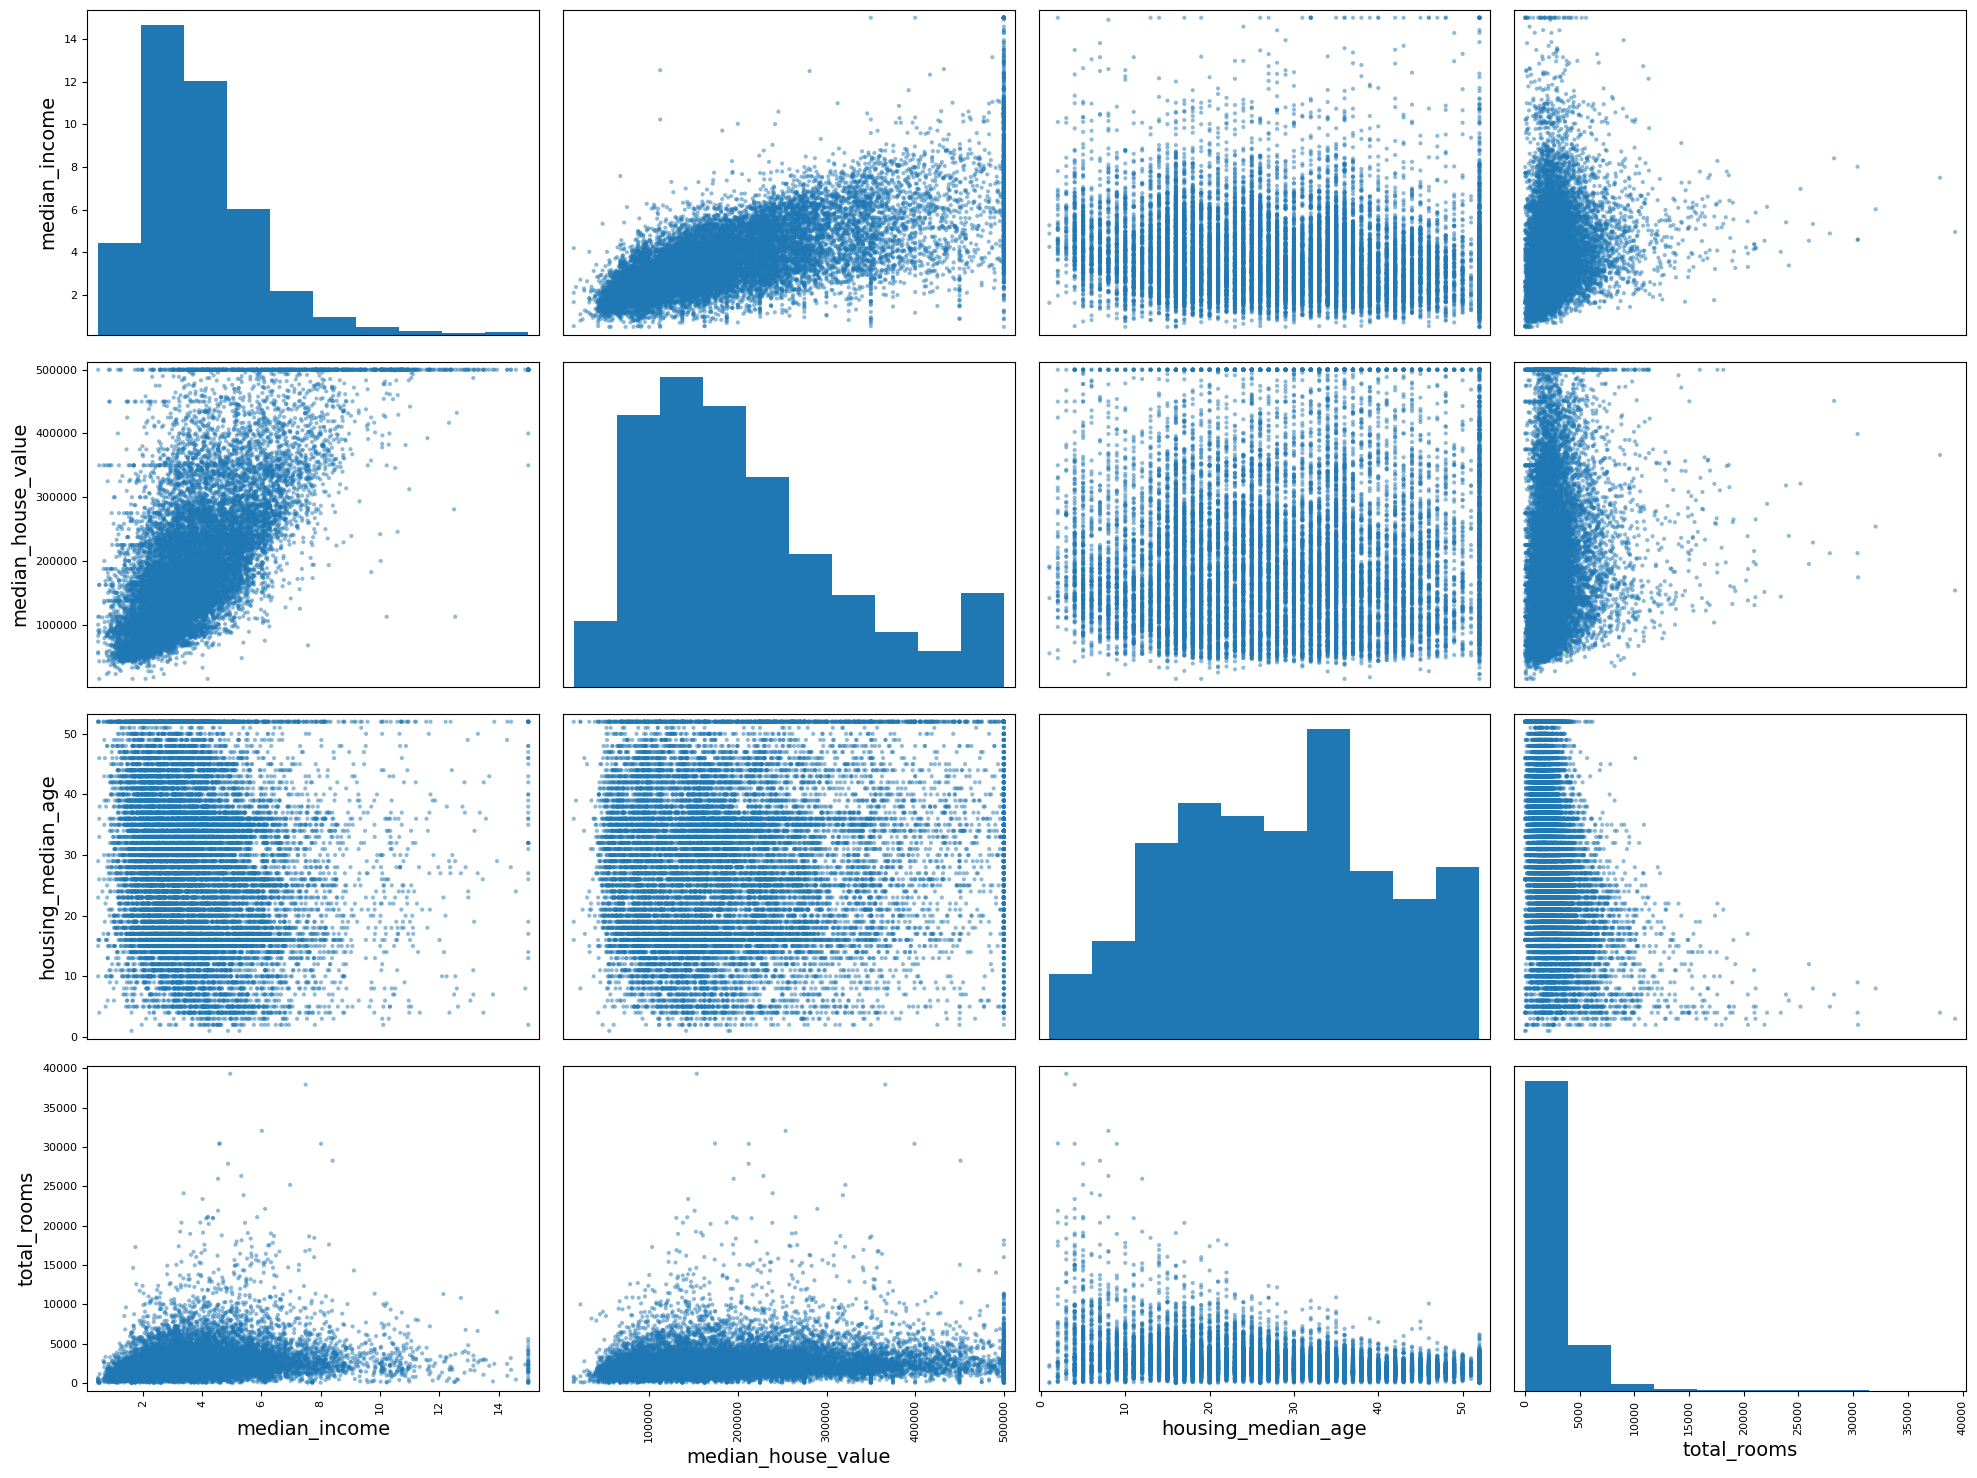

In [42]:
%matplotlib inline
from pandas.plotting import scatter_matrix
scatter_matrix(housing[['median_income', 'median_house_value', 'housing_median_age', 'total_rooms']], figsize=(20, 15))
save_fig('scatter_matrix_plot')
plt.show()

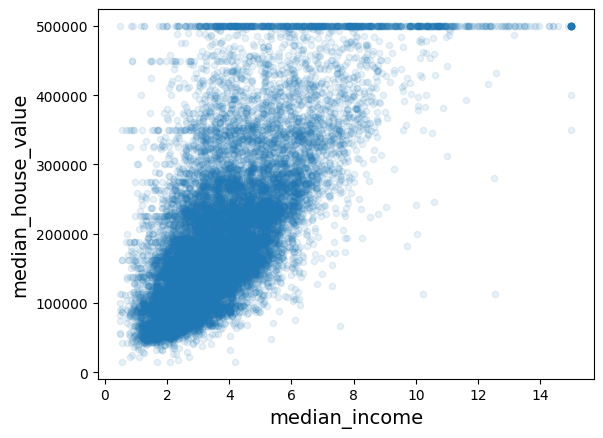

In [43]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', legend=True, alpha=0.1)
plt.show()

# Engineering new features

In [44]:

housing['rooms_per_house'] = housing['total_rooms'] / housing['households']
housing['bedrooms_ratio'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']
corr_matrix = housing.corr()

In [45]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688380
rooms_per_house             0.143663
total_rooms                 0.137455
housing_median_age          0.102175
households                  0.071426
total_bedrooms              0.054635
population                 -0.020153
population_per_household   -0.038224
longitude                  -0.050859
latitude                   -0.139584
bedrooms_ratio             -0.256397
Name: median_house_value, dtype: float64

# 4. Prepare the data for machine learning algorithm

In [46]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_y = strat_train_set['median_house_value'].copy()

# Data Cleaning
"""
housing.dropna(subset='total_bedrooms') option 1
housing.drop('total_bedrooms', axis=1) option 2
median = housing['total_bedrooms'].median() option 3
housing['total_bedrooms'].ffilna(median, inplace=True) 
"""

"\nhousing.dropna(subset='total_bedrooms') option 1\nhousing.drop('total_bedrooms', axis=1) option 2\nmedian = housing['total_bedrooms'].median() option 3\nhousing['total_bedrooms'].ffilna(median, inplace=True) \n"

In [47]:
null_rows_idx = housing.isnull().any(axis=1) # returns a boolean
housing.loc[null_rows_idx]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,NaN,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,NaN,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
2348,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
366,-122.50,37.75,44.0,1819.0,NaN,1137.0,354.0,3.4919,NEAR OCEAN
18241,-121.44,38.54,39.0,2855.0,NaN,1217.0,562.0,3.2404,INLAND
18493,-116.21,33.75,22.0,894.0,NaN,830.0,202.0,3.0673,INLAND


In [48]:
# create different copies of housing
housing_option1 = housing.copy()
housing_option1.dropna(subset='total_bedrooms', inplace=True)

housing_option2 = housing.drop('total_bedrooms', axis=1)

housing_option3 = housing.copy()
median = housing_option3['total_bedrooms'].median()

housing_option3['total_bedrooms'].fillna(median, inplace=True)
housing_option3.loc[null_rows_idx] # shows the replacement with median

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
2348,-122.70,38.35,14.0,2313.0,434.0,954.0,397.0,3.7813,<1H OCEAN
366,-122.50,37.75,44.0,1819.0,434.0,1137.0,354.0,3.4919,NEAR OCEAN
18241,-121.44,38.54,39.0,2855.0,434.0,1217.0,562.0,3.2404,INLAND
18493,-116.21,33.75,22.0,894.0,434.0,830.0,202.0,3.0673,INLAND


In [49]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median') # How you want the nan values to be filled

housing_num = housing.select_dtypes(include=np.number)  # To select only numerical attriutes

X = imputer.fit_transform(housing_num) # To fit and transform 

nun = housing_num.isnull().any(axis=1)

housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index) # converts it from numpy arrray to a dataframe 

housing_tr.loc[nun].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020


In [50]:
print(f'Median of each attribute: {imputer.statistics_}\n')
print(f'Manual computation of the median: {housing_num.median().values}\n')
print(f'Names of the features: {imputer.feature_names_in_}\n')
print(f'Strategy used: {imputer.strategy}')

Median of each attribute: [-118.51     34.26     29.     2125.      434.     1167.      408.
    3.5385]

Manual computation of the median: [-118.51     34.26     29.     2125.      434.     1167.      408.
    3.5385]

Names of the features: ['longitude' 'latitude' 'housing_median_age' 'total_rooms'
 'total_bedrooms' 'population' 'households' 'median_income']

Strategy used: median


In [51]:
# Handling Outliers
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)

outlier_pred = isolation_forest.fit_predict(X)
outlier_pred

array([-1,  1,  1, ...,  1,  1,  1])

In [52]:
# Handling Categorical attributes
categorical_attribute = housing[['ocean_proximity']]
categorical_attribute.head(10)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY
18031,<1H OCEAN
6753,<1H OCEAN


In [53]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

housing_cat_enc = ordinal_encoder.fit_transform(categorical_attribute)

print(f'Encoded_Categories: {ordinal_encoder.categories_}')

housing_cat_enc[:8]

Encoded_Categories: [array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

In [54]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()

h = onehot_encoder.fit_transform(housing_cat_enc)

In [55]:
onehot_encoder.categories_

[array([0., 1., 2., 3., 4.])]

In [56]:
h[:5]

<5x5 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [57]:
h.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [58]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()

h = onehot_encoder.fit_transform(categorical_attribute)

In [59]:
h

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [60]:
df_test = pd.DataFrame({'ocean_proximity': ['INLAND', 'NEAR BAY']})
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [61]:
onehot_encoder.transform(df_test)

<2x5 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

# 4.Custom Transformer

In [62]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_peroom=True):
        self.add_bedrooms_peroom = add_bedrooms_peroom

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        rooms_perhouse_hold = X[:, rooms_ix] / X[:, household_ix]
        population_perhouse_hold = X[:, population_ix] / X[:, household_ix]

        if self.add_bedrooms_peroom:
            bed_rooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_perhouse_hold, population_perhouse_hold, bed_rooms_per_room]
        else:
            return np.c_[X, rooms_perhouse_hold, population_perhouse_hold]

attr_adder = CombinedAttributesAdder(add_bedrooms_peroom=False)
hosing_extra = attr_adder.transform(housing.values)

In [63]:
hosing_extra

array([[-122.42, 37.8, 52.0, ..., 'NEAR BAY', 3.211798839458414,
        1.5241779497098646],
       [-118.38, 34.14, 40.0, ..., '<1H OCEAN', 5.504201680672269,
        1.865546218487395],
       [-121.98, 38.36, 33.0, ..., 'INLAND', 5.334975369458128,
        2.768472906403941],
       ...,
       [-117.06, 32.59, 13.0, ..., 'NEAR OCEAN', 5.157894736842105,
        3.7026315789473685],
       [-118.4, 34.06, 37.0, ..., '<1H OCEAN', 4.511933174224343,
        2.058472553699284],
       [-122.41, 37.66, 44.0, ..., 'NEAR OCEAN', 2.0330188679245285,
        3.2169811320754715]], dtype=object)

# Feature Scaling
MinMaxScaler and Standard scaler(Normalisation): MinMaxScaler is done by subtracting the minimum value devided by 
the maximum value minus the minimum value.

StandardScaler: It subtracts each value by the mean and then divides by the standard deviation(Standardise values have zero mean)


Warning!!!
Note:
As with transformation it is important to fit the scalers to the training data only not the full data set including the test set.
Its only after you have fitted to the training data thats when you can use them to transform the training data and test data 
that also includes new data

In [64]:
# MinMaxScaler and Standard scaler

# 4.1 Transformation Pipeline

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribute_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-1.42303652,  1.0136059 ,  1.86111875, ..., -0.86602737,
        -0.33020372,  1.84662439],
       [ 0.59639445, -0.702103  ,  0.90762971, ...,  0.0245495 ,
        -0.25361631, -0.5081207 ],
       [-1.2030985 ,  1.27611874,  0.35142777, ..., -0.04119332,
        -0.05104091, -0.20215476],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ..., -0.10998748,
         0.15854151, -0.24249175],
       [ 0.58639727, -0.73960483,  0.66925745, ..., -0.36093745,
        -0.21033248,  0.25977479],
       [-1.41803793,  0.94797769,  1.22545939, ..., -1.32397227,
         0.04958379,  3.61270996]])

In [66]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
    
])
housing_prepared = full_pipeline.fit_transform(housing)

In [67]:
housing_prepared

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.59639445, -0.702103  ,  0.90762971, ...,  0.        ,
         0.        ,  0.        ],
       [-1.2030985 ,  1.27611874,  0.35142777, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41803793,  0.94797769,  1.22545939, ...,  0.        ,
         0.        ,  1.        ]])

# Select and train a model

In [68]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,INLAND
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,<1H OCEAN


In [69]:
housing_y

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
           ...   
14207    500001.0
13105     88800.0
19301    148800.0
19121    500001.0
19888    233300.0
Name: median_house_value, Length: 16512, dtype: float64

In [70]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(housing_prepared, housing_y)

LinearRegression()

In [71]:
# checking how well the model performed on some data
some_data = housing.iloc[:5]
some_labels = housing_y.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Prediction:", lr.predict(some_data_prepared))
print("Actual Values", list(some_labels))

Prediction: [276608.27419651 333603.0303772  118237.5726011  108255.75159886
 308943.82732346]
Actual Values [458300.0, 483800.0, 101700.0, 96100.0, 361800.0]


In [72]:
from sklearn.metrics import mean_squared_error
housing_predict = lr.predict(housing_prepared)
mean_squared_error(housing_y, housing_predict)

4592653784.779145

In [73]:
np.sqrt(mean_squared_error(housing_y, housing_predict))

67769.12117461127

# The linear regression above is an example of underfitting
To deal with underfitting you need to;
1. Engineer more features
2. Use more powerful model
3. Or to reduce constraint on the model
### NB: The model above is not regularised which means the last option would be ruled out

In [74]:
# Trying a more complex model
from sklearn.tree import  DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(housing_prepared, housing_y)
housing_prediction =  dtr.predict(housing_prepared)
dtr_mse = mean_squared_error(housing_y, housing_prediction)
np.sqrt(dtr_mse)

0.0

In [75]:
print("Prediction:", dtr.predict(some_data_prepared))
print("Actual Values", list(some_labels)) # This model is hence considered absolutely perfect(overfitting)

Prediction: [458300. 483800. 101700.  96100. 361800.]
Actual Values [458300.0, 483800.0, 101700.0, 96100.0, 361800.0]


In [76]:
# When building a machine learning model you need to use need to use some of the training set for model evaluation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dtr, housing_prepared, housing_y, scoring="neg_mean_squared_error", cv=10)
scores = np.sqrt(-scores)

In [77]:
def display_results(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())
    exit(1)

In [78]:
display_results(scores)

Scores: [67041.68917058 67568.46132464 67671.32364968 72565.0892242
 70865.09467156 70850.39852626 73569.93225063 71888.5409301
 68967.01721219 68977.17706746]
Mean: 69996.47240273077
Standard Deviation: 2157.824480366037


# NOTE
Scikit learn cross validation feature expect a utility function (greater is better) rather than cost function (lower is better)
Hence the scoring function is usually the opposite of MSE (i.e a negative value) which is why the preceding code computes -scores before calculating the square root 

In [79]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_y)
housing_pred = forest_reg.predict(housing_prepared)
forest_rmse = mean_squared_error(housing_y, housing_pred)
[...]
forest_rmse

344917626.8284784

In [80]:
import joblib 
joblib.dump(dtr, "my_model.pkl")

['my_model.pkl']

list